<a href="https://colab.research.google.com/github/ganeshutah/Jove/blob/master/For_CS3100_Fall2024/03_Advanced_DFA/DFA-Illustrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DFA design exercise

DFA that accepts (Odd 0's or Even 1's) AND the number MSB-first isn't divisible by 3

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True

if OWN_INSTALL:

  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',
                   '../../../..',  '../../../../3rdparty',
                   '../../..',     '../../../3rdparty',
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_DFA    import *
from jove.Def_NFA import *
from jove.LangDef    import *  # for testing DFA actions
from jove.Def_RE2NFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(flTup)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)

Odd 0's

Generating LALR tables


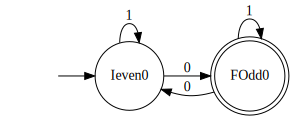

In [2]:
# DFA over {0,1} that accepts all strings that contain odd # of 0's

Odd_zeros = md2mc('''
DFA

Ieven0 : 0 -> FOdd0
Ieven0 : 1 -> Ieven0

FOdd0 : 0 -> Ieven0
FOdd0 : 1 -> FOdd0
''')

dotObj_dfa(Odd_zeros, FuseEdges=True)

Even 1's

Generating LALR tables


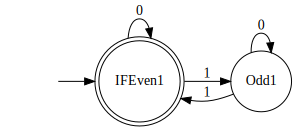

In [3]:
# DFA over {0,1} that accepts all strings that contain an even number of 1's

Even_ones = md2mc('''
DFA

IFEven1 : 0 -> IFEven1
IFEven1 : 1 -> Odd1

Odd1 : 0 -> Odd1
Odd1 : 1 -> IFEven1
''')

dotObj_dfa(Even_ones, FuseEdges=True)

Odd 0's OR even 1's

In [4]:
help(union_dfa)

Help on function union_dfa in module jove.Def_DFA:

union_dfa(D1in, D2in, flatten_states=False)
    In : D1in (consistent DFA)
         D2in (consistent DFA)
         If flatten_states (Boolean), it turns paired states into string
    Out: DFA for language union of D1in, D2in (consistent DFA).



In [5]:
help(dotObj_dfa)

Help on function dotObj_dfa in module jove.DotBashers:

dotObj_dfa(D, FuseEdges=False, dfaName='do_', STATENAME_MAXSIZE=20)
    In : D1 (DFA : partially consistent)
         dfaName (string)
         STATENAME_MAXSIZE : number
    Out: A dot object. 
    Generate a dot object representing the automaton. 
    Suppress "black-hole states".



In [6]:
Odd0s_Even1s = union_dfa(Odd_zeros, Even_ones)

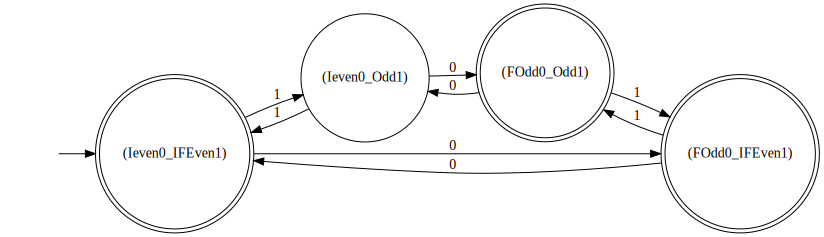

In [7]:
dotObj_dfa(Odd0s_Even1s)

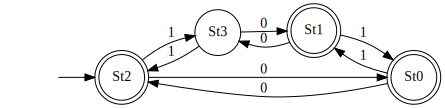

In [8]:
dotObj_dfa(Odd0s_Even1s, STATENAME_MAXSIZE=1)

# Mod-3 DFA, MSB-first

(But, does it matter whether MSB-first or LSB-first?)



Generating LALR tables


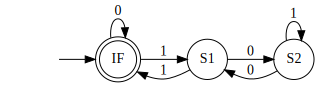

In [9]:
## KEEP DRAWING WHILE YOU FILL !!

DFA3 = md2mc('''DFA

IF : 0 -> IF
IF : 1 -> S1

S1 : 0 -> S2
S1 : 1 -> IF

S2 : 0 -> S1
S2 : 1 -> S2


''')

dotObj_dfa(DFA3)

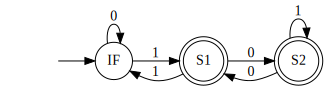

In [10]:
# MSB-first isn't divisible by 3 - obtained by complementing the above one

not_DFA3 = comp_dfa(DFA3)
dotObj_dfa(not_DFA3)

Finally, (Odd0 or Even1) AND (not mod div by 3) - shows the power of Boolean operations on DFA

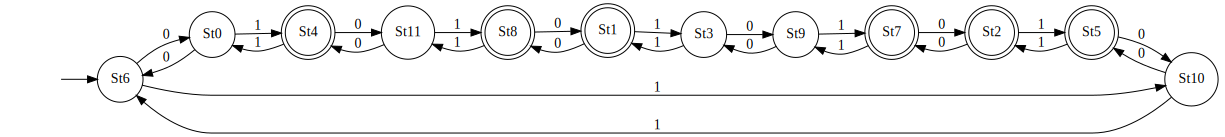

In [11]:
O0_or_E1_and_nm3 = intersect_dfa(Odd0s_Even1s, not_DFA3)
dotObj_dfa(O0_or_E1_and_nm3, STATENAME_MAXSIZE=1)

In [12]:
min_answer = min_dfa(O0_or_E1_and_nm3)

In [13]:
len(min_answer["Q"])

12

In [14]:
len(O0_or_E1_and_nm3["Q"])

12

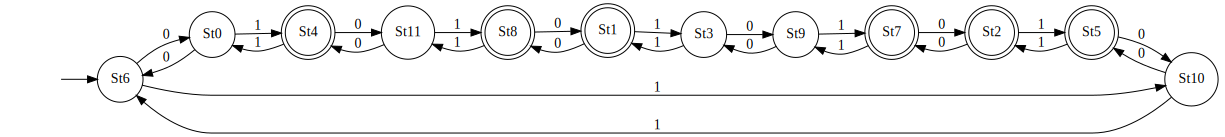

In [15]:
dotObj_dfa(min_answer, STATENAME_MAXSIZE=1)

# Even the min DFA can be large! The language is so unusual and complex, and hence minimization has low (or no?) impact.

# We will now demonstrate the code underlying Exercise 5.2.1, Block-of-3 DFA beginning at around Page 334.
## The specific illustration pertains to the ALT series on Page 338.

The ALT series where (1,0) goes to (2,0) upon a 0, and so on. Let's write the transitions out first. (Clearly you can generate this programmatically by following the condensed rules on this page). The accepting states are double-circled - or double-bracketed here.

((1,0)) : 0 -> ((2,0))

((1,0)) : 1 -> (2,1)

((2,0)) : 0 -> ((1,0))

((2,0)) : 1 -> (1,2)

(2,1) : 0 -> (1,1)

(2,1) : 1 -> ((1,0))

(1,2) : 0 -> (2,2)

(1,2) : 1 -> ((2,0))

(1,1) : 0 -> (2,1)

(1,1) : 1 -> (2,2)

(2,2) : 0 -> (1,2)

(2,2) : 1 -> (1,1)

Generating LALR tables


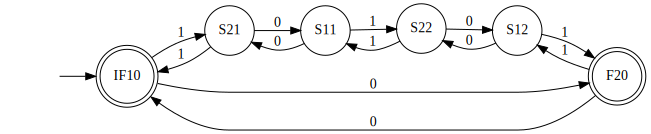

In [16]:
# The DFA in Automd format
LSB_mod3 = md2mc('''DFA
IF10 : 0 -> F20
IF10 : 1 -> S21

F20 : 0 -> IF10
F20 : 1 -> S12

S21 : 0 -> S11
S21 : 1 -> IF10

S12 : 0 -> S22
S12 : 1 -> F20

S11 : 0 -> S21
S11 : 1 -> S22

S22 : 0 -> S12
S22 : 1 -> S11
''')
dotObj_dfa(LSB_mod3, FuseEdges="True")

Let us now reassure ourselves that our construction is right

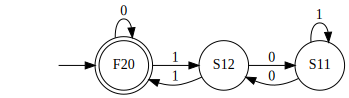

In [17]:
MIN_LSB_mod3 = min_dfa(LSB_mod3)
dotObj_dfa(MIN_LSB_mod3, FuseEdges="True")

# Wow, the power of theory! It shows that it is isomorphic to the DFA for MSB-first. This is a property enjoyed by mod-3 . See if it works for other modulii :-)

REs can help generate DFAs quickly - this is a quick way to generate "third-last, fourth-last, ..." quickly

# Illustrate REs to generate test DFA

## While we've not studied regular expressions, you can pretty much follow what I'm saying here...

## A 0 followed by any number of 0s (``any number means zero or more'')
## followed by any number of 0s or 1s

In [18]:
re2nfa('00*(0+1*)')

{'Q': {'St1', 'St10', 'St2', 'St3', 'St4', 'St5', 'St6', 'St7', 'St8', 'St9'},
 'Sigma': {'0', '1'},
 'Delta': {('St1', '0'): {'St2'},
  ('St5', ''): {'St10', 'St3', 'St6'},
  ('St3', '0'): {'St4'},
  ('St4', ''): {'St5'},
  ('St2', ''): {'St5'},
  ('St6', '0'): {'St7'},
  ('St10', ''): {'St8'},
  ('St8', '1'): {'St9'},
  ('St9', ''): {'St10'}},
 'Q0': {'St1'},
 'F': {'St10', 'St7'}}

In [19]:
nd = nfa2dfa(re2nfa('00*(0+1*)'))

In [20]:
mnd = min_dfa(nd, state_name_mode='verbose')

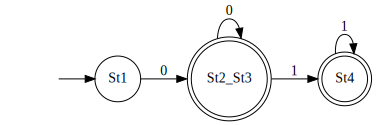

In [21]:
dotObj_dfa(mnd, FuseEdges="True")

# Now generate n-th last is a 1 for various n

In [22]:
last3 = min_dfa(nfa2dfa(re2nfa('(0+1)*1(0+1)(0+1)')))
last4 = min_dfa(nfa2dfa(re2nfa('(0+1)*1(0+1)(0+1)(0+1)')))
last5 = min_dfa(nfa2dfa(re2nfa('(0+1)*1(0+1)(0+1)(0+1)(0+1)')))
last6 = min_dfa(nfa2dfa(re2nfa('(0+1)*1(0+1)(0+1)(0+1)(0+1)(0+1)')))

In [23]:
len(last3["Q"])

8

In [24]:
len(last4["Q"])

16

In [25]:
len(last5["Q"])

32

In [26]:
len(last6["Q"])

64

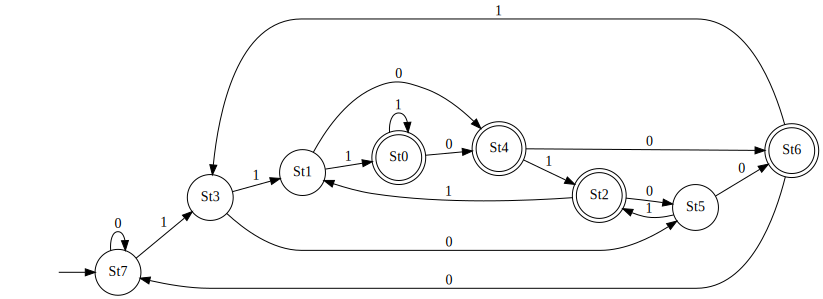

In [27]:
dotObj_dfa(last3, FuseEdges="True")

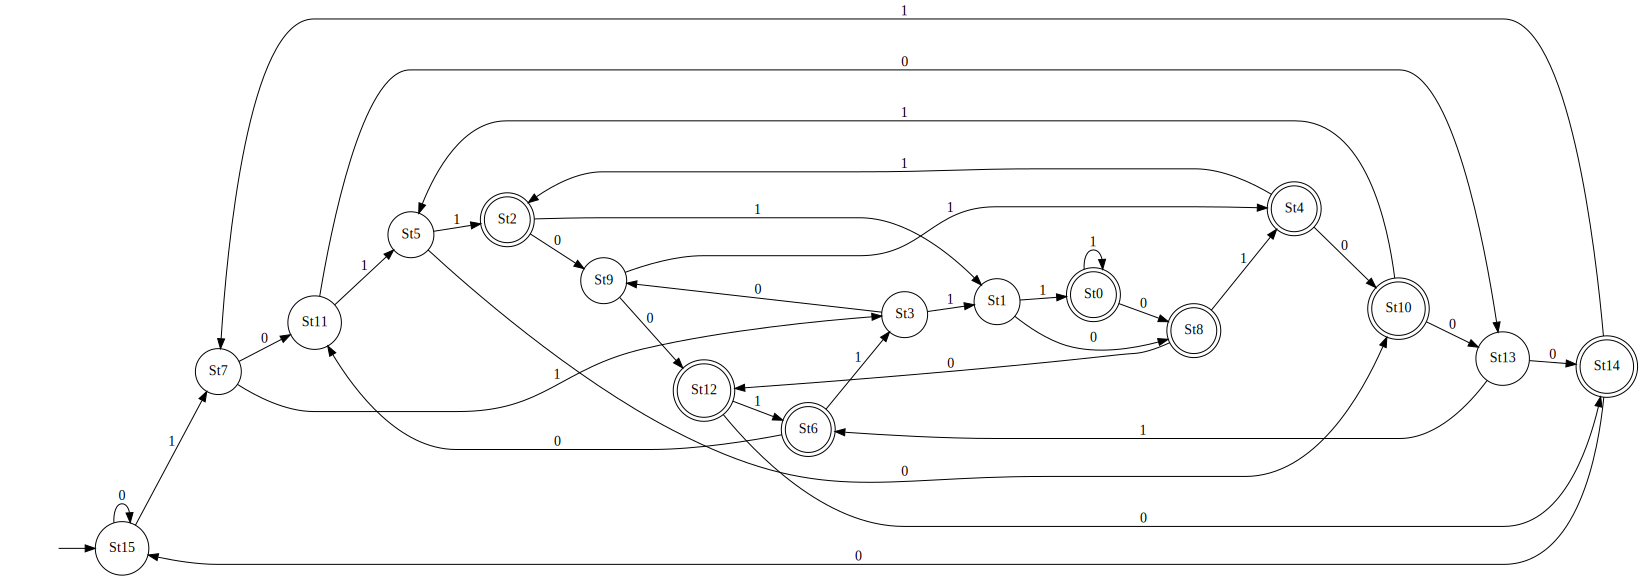

In [28]:
dotObj_dfa(last4, FuseEdges="True")

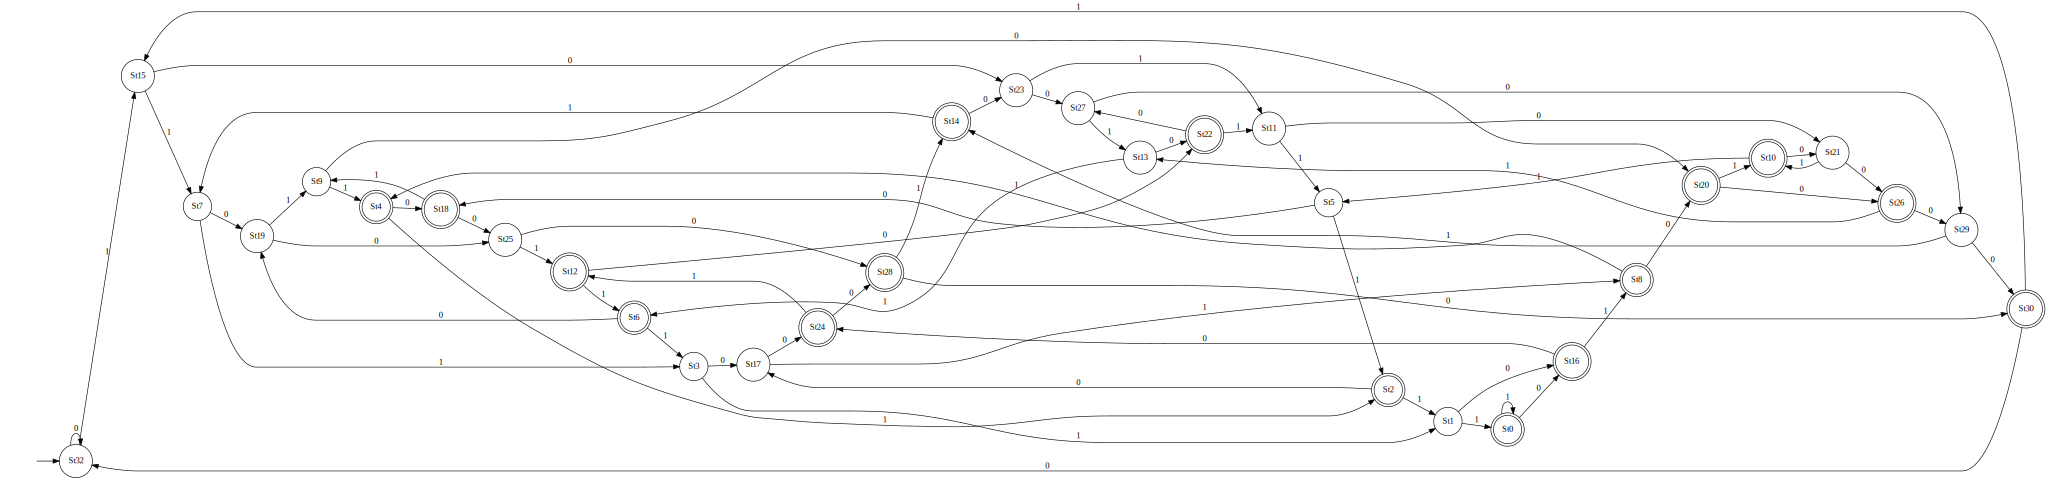

In [29]:
dotObj_dfa(last5, FuseEdges="True")

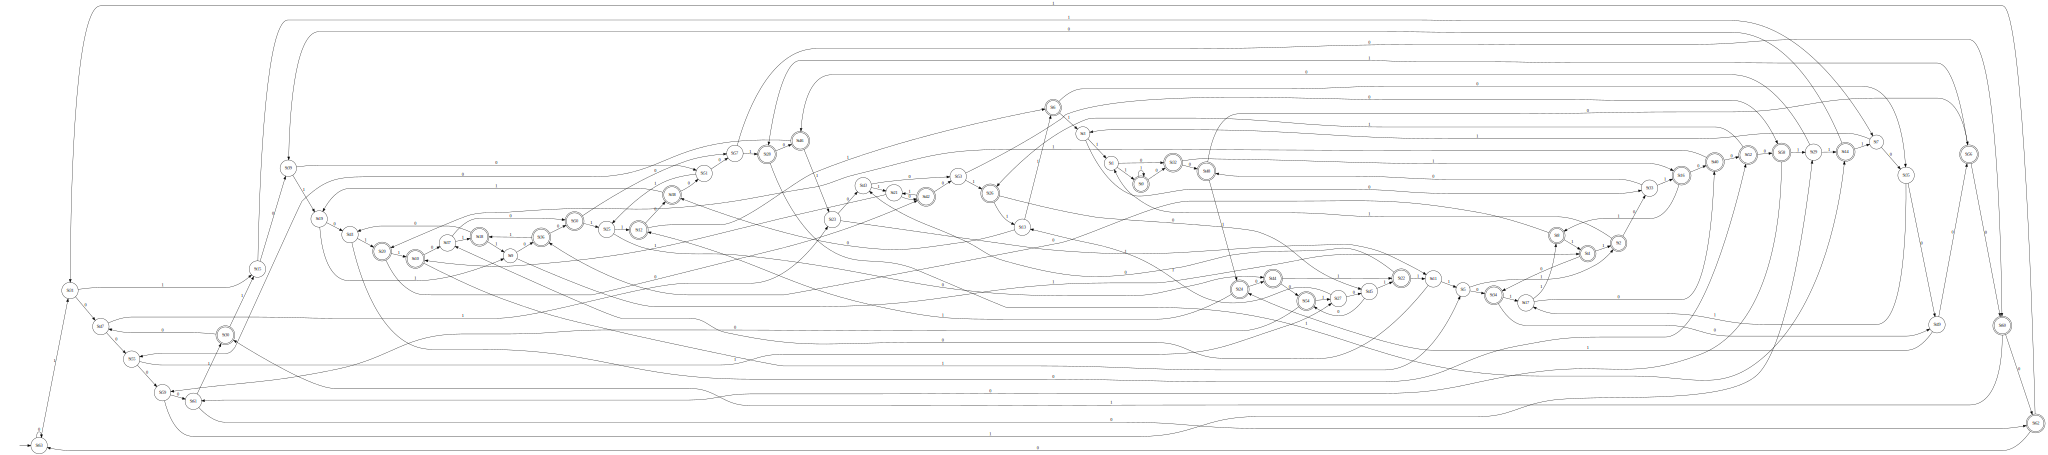

In [30]:
dotObj_dfa(last6, FuseEdges="True")

In [31]:
help(min_dfa)

Help on function min_dfa in module jove.Def_DFA:

min_dfa(D, state_name_mode='succinct', chatty=False)
    The top-level callable DFA minimizer.
    
    In : D (consistent DFA to be minimized)
    Out: Minimized version of D.
    
    Given a DFA D, go through the state minimization algorithm.
    
    Setting chatty=True helps reveal the detailed steps. Please try it!        
    
    If the state_name_mode is verbose, we will make state names
    by stringing together the state names in the equivalence
    classes. If 'succinct', then only the name of the equivalence-class
    representative is retained.



In [32]:
len(nd["Q"])

5

In [33]:
len(mnd["Q"])

4

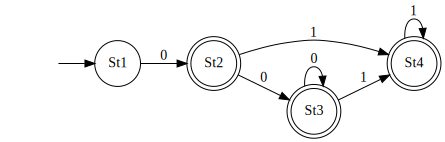

In [34]:
dotObj_dfa(nd, STATENAME_MAXSIZE=40)

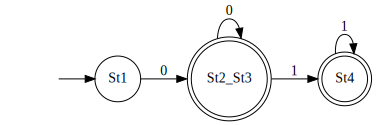

In [35]:
dotObj_dfa(mnd)